In [317]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn import metrics

import joblib

import matplotlib.pyplot as plt

train = pd.read_csv('static/data/train.csv')
test = pd.read_csv('static/data/test.csv')

In [294]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [295]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
y_train = train['label']
X_train = train.drop(columns=['label'])

In [297]:
del train

y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [298]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()

In [299]:
print('Number of Trees used : ', model.n_estimators)

Number of Trees used :  100


In [300]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [301]:
predict= model.predict(X_train)
predict

array([1, 0, 1, ..., 7, 6, 9])

In [302]:
cm= metrics.confusion_matrix(y_train,model.predict(X_train))
cm

array([[4132,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 4684,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 4177,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 4351,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 4072,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 3795,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 4137,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4401,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4063,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 4188]])

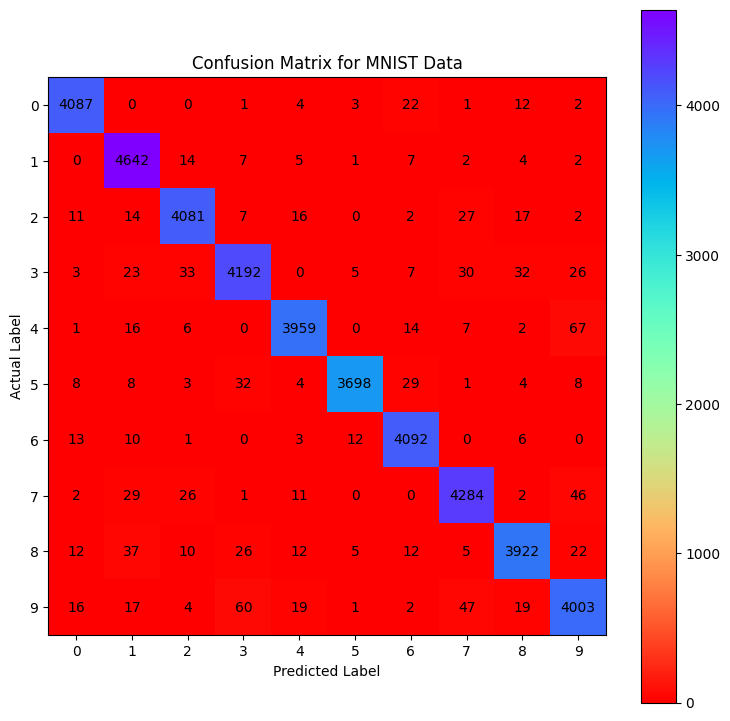

In [318]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [303]:
from sklearn.metrics import accuracy_score
trainaccuracy= accuracy_score(y_train,model.predict(X_train))
trainaccuracy
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

Train Data Accuracy    :100.0 %


In [304]:
from sklearn.model_selection import GridSearchCV

In [305]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [306]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [307]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [308]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: user 14.4 s, sys: 1.58 s, total: 16 s
Wall time: 15min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [309]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [310]:
cm= metrics.confusion_matrix(y_train,rf_best.predict(X_train))
cm

array([[4087,    0,    0,    1,    4,    3,   22,    1,   12,    2],
       [   0, 4642,   14,    7,    5,    1,    7,    2,    4,    2],
       [  11,   14, 4081,    7,   16,    0,    2,   27,   17,    2],
       [   3,   23,   33, 4192,    0,    5,    7,   30,   32,   26],
       [   1,   16,    6,    0, 3959,    0,   14,    7,    2,   67],
       [   8,    8,    3,   32,    4, 3698,   29,    1,    4,    8],
       [  13,   10,    1,    0,    3,   12, 4092,    0,    6,    0],
       [   2,   29,   26,    1,   11,    0,    0, 4284,    2,   46],
       [  12,   37,   10,   26,   12,    5,   12,    5, 3922,   22],
       [  16,   17,    4,   60,   19,    1,    2,   47,   19, 4003]])

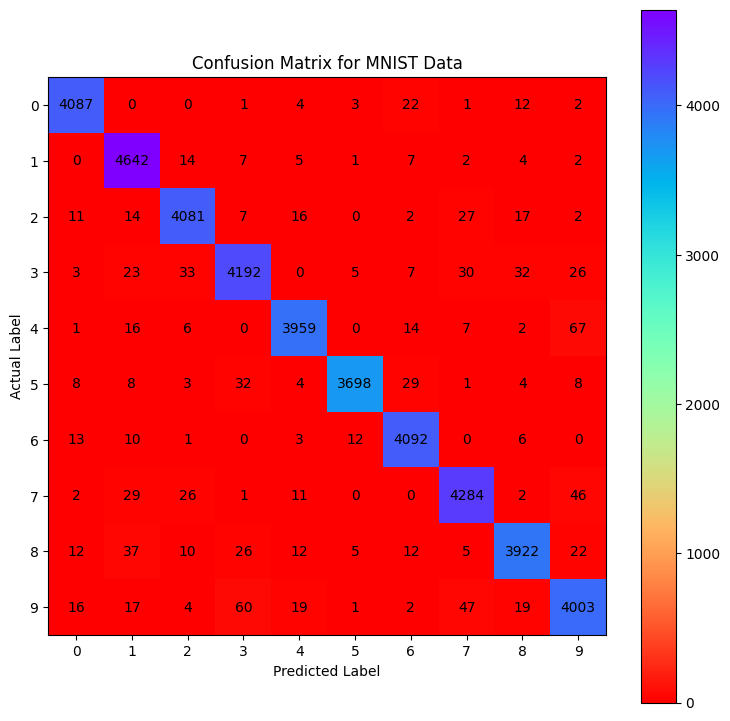

In [319]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [311]:
trainaccuracy= accuracy_score(y_train,rf_best.predict(X_train))
trainaccuracy
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

Train Data Accuracy    :97.52 %


In [312]:
result = model.predict(test)


result = pd.Series(result,name="Label")
result

0        2
1        0
2        9
3        4
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [313]:
from PIL import Image

image_file = Image.open('static/img/2.png')

In [314]:
from PIL import Image

image_file = Image.open('static/img/0.png')
image_file = image_file.convert('L')
image_file = image_file.point(lambda x: 255 - x)
image_file = image_file.resize((28, 28))
array_image_file = np.array(image_file)  
array_image_file = array_image_file.flatten() 

predict = model.predict(array_image_file.reshape(1, -1))
predict

/Users/florianberthelot/.pyenv/versions/3.10.7/envs/flask/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [315]:
path = 'static/model.joblib'

joblib.dump(model, path)

['static/model.joblib']